# Proyecto integrador 6

El presente proyecto se centra en el análisis de información relacionada con las ventas y puntuaciones de un conjunto de datos sobre videojuegos de diversas plataformas en distintas regiones.

El objetivo principal es realizar un análisis detallado que permita extraer información clave y proporcionar respuestas críticas y precisas sobre el comportamiento del mercado reflejado en el dataset.
                                      

El siguiente proyecto usara una base de datos con la siguiente informacion:
### Descripción de datos

— *Name* (Nombre)

— *Platform* (Plataforma)

— *Year_of_Release* (Año de lanzamiento)

— *Genre* (Género)

— *NA_sales* (ventas en Norteamérica en millones de dólares estadounidenses)

— *EU_sales* (ventas en Europa en millones de dólares estadounidenses)

— *JP_sales* (ventas en Japón en millones de dólares estadounidenses)

— *Other_sales* (ventas en otros países en millones de dólares estadounidenses)

— *Critic_Score* (máximo de 100)

— *User_Score* (máximo de 10)

— *Rating* (ESRB)

Es posible que los datos de 2016 estén incompletos.


# Preparar los archivos:
Procedere a importar las librerias necesarias y definir nuestro df

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Procedo a cargar el dataset

In [3]:
df=pd.read_csv('games.csv',sep=",")
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Observo que los nombres de las columnas tienen mayusculas y minusculas pero que no esta estandarizado, proceso a pasarlo todo a minusculas para tener todo estandarizado.

In [4]:
df.columns=df.columns.str.lower()   
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
print(df.isnull().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


Observamos que en diferentes columnas hay valores nulos, me llama más la atencion la columna con 2 filas vacias. Procedo a visualizar estas dos filas.

In [6]:
#uso lo siguiente para visualizar las tablas de mejor manera.
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.expand_frame_repr', False)  # Evita el salto de línea automático

In [7]:
print(df[df['name'].isnull()])

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  other_sales  critic_score user_score rating
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00         0.08           NaN        NaN    NaN
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03         0.00           NaN        NaN    NaN


Observo que estas filas filtradas tienen muchos valores ausentes, entonces estas filas serán eliminadas ya que muy dificilmente me puede proporcionar informacion.

In [8]:
df.dropna(subset=['name'], inplace=True)
print(df[df['name'].isnull()])

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []


Ahora me enfocare en las demas columnas de score para ver porque tienen tantos valores ausentes.

In [9]:
print(df[df['critic_score'].isnull()].sample(5))

                                               name platform  year_of_release         genre  na_sales  eu_sales  jp_sales  other_sales  critic_score user_score rating
5301        The Fairly Odd Parents: Shadow Showdown      PS2           2004.0      Platform      0.17      0.13      0.00         0.04           NaN        NaN    NaN
3194          Mobile Suit Z Gundam: AEUG vs. Titans      PS2           2003.0      Fighting      0.00      0.00      0.63         0.00           NaN        NaN    NaN
11764  Kinnikuman Muscle Grand Prix Max 2: Tokumori      PS2           2008.0      Fighting      0.00      0.00      0.07         0.00           NaN        NaN    NaN
10361               Tales of the World: Reve Unitia      3DS           2014.0  Role-Playing      0.00      0.00      0.11         0.00           NaN        NaN    NaN
11061                            V-Rally Edition 99      N64           1998.0        Racing      0.07      0.02      0.00         0.00           NaN        NaN    Na

Observo que no hay un patron en especifico para los NaN, algo que noto es que en 'user_score' hay filas con el valor "tbd", esto significa que sera por confirmar, cosa que no nos agrega valor en este estudio, procederé a convertir estos valores a NaN, porque es realmente eso valores ausentes.

In [10]:
df['user_score'] = df['user_score'].replace('tbd', pd.NA)


Ahora que eliminamos el "tbc" procedemos a cambiar el tipo de la columna de objeto a flotante. Igual corregiremos otras columnas.


In [11]:
print(df.info())
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['critic_score'] = pd.to_numeric(df['critic_score'], errors='coerce').astype(float)
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce').astype(float)
print()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB
None

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object

Ahora procedere a rellenar los valores vacios con la mediana, esto se hara asi para futuros estudios estadiscticos, y no se usa la media porque la mediana tiene menos sensibilidad a valores extremos, entonces no se ve afectada por valores atipicos muy altos o muy bajos.

In [12]:
df[['user_score', 'critic_score']] = df[['user_score', 'critic_score']].fillna(df[['user_score', 'critic_score']].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


In [13]:
print(df.isnull().sum())
valores_ausentes_año_por_consola=(df[df['year_of_release'].isnull()]).groupby('platform').size()
valores_ausentes_año_por_consola


name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6764
dtype: int64


platform
2600    17
3DS      8
DS      30
GB       1
GBA     11
GC      14
N64      3
PC      17
PS       7
PS2     34
PS3     25
PSP     16
PSV      1
Wii     34
X360    30
XB      21
dtype: int64

Obtengo asi una lista de las plataformas con valores ausentes, como seria más tardado y tal vez inecesario buscar por cada juego, hice un promedio por plataforma de su auge de popularidad, por ejemplo el nintendo 3DS su año más popular fue en 2013, entonces a todos los juegos de 3DS se les pondra 2013 para sacar un estimado.

In [14]:
años_consolas_faltantes = {
    '2600': 1982,
    '3DS': 2013,
    'DS': 2006,
    'GB': 1990,
    'GBA': 2002,
    'GC': 2004,
    'N64': 1997,
    'PC': 2010,
    'PS': 1994,
    'PS2': 2004,
    'PS3': 2012,
    'PSP': 2005,
    'PSV': 2012,
    'Wii': 2008,
    'X360': 2012,
    'XB': 2001
}
def llenar_años(df):
    for i, fila in df[df['year_of_release'].isna()].iterrows():
        platform = fila['platform']
        if platform in años_consolas_faltantes:  
            df.at[i, 'year_of_release'] = años_consolas_faltantes[platform]
    return df
df = llenar_años(df)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 2.1+ MB


In [16]:
print(df[df['rating'].isna()].sample(7))

                                      name platform  year_of_release         genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating
2886     WarioWare, Inc.: Mega Party Game$       GC             2003        Puzzle      0.20      0.05      0.44         0.02          71.0         7.5    NaN
8187                        Summon Night 4      PS2             2006  Role-Playing      0.00      0.00      0.18         0.00          71.0         7.5    NaN
14728                        In Cold Blood       PS             2000     Adventure      0.02      0.01      0.00         0.00          71.0         7.5    NaN
13641                   No Rules: Get Phat      GBA             2001        Action      0.03      0.01      0.00         0.00          71.0         7.5    NaN
14415  Hiiro no Kakera 2: Hisui no Shizuku      PS2             2007     Adventure      0.00      0.00      0.03         0.00          71.0         7.5    NaN
12103           Suzumiya Haruhi no Gekidou    

En el caso de los valores ausentes en rating, hay poco que se pueda hacer, ya que si son una cifra considerable de los datos totales, ademas de que no presenta un patron para esta ausencia de datos. Por lo tanto se procedera a dejar como valores ausentes.

Como siguiente paso procedere a calcular las ventas totales de cada juego por todas las regiones.

In [17]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
column_order = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 
                'eu_sales', 'jp_sales', 'other_sales', 'total_sales', 
                'critic_score', 'user_score', 'rating']
df = df[column_order]
print(df.head())


                       name platform  year_of_release         genre  na_sales  eu_sales  jp_sales  other_sales  total_sales  critic_score  user_score rating
0                Wii Sports      Wii             2006        Sports     41.36     28.96      3.77         8.45        82.54          76.0         8.0      E
1         Super Mario Bros.      NES             1985      Platform     29.08      3.58      6.81         0.77        40.24          71.0         7.5    NaN
2            Mario Kart Wii      Wii             2008        Racing     15.68     12.76      3.79         3.29        35.52          82.0         8.3      E
3         Wii Sports Resort      Wii             2009        Sports     15.61     10.93      3.28         2.95        32.77          80.0         8.0      E
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27      8.89     10.22         1.00        31.38          71.0         7.5    NaN


# Analissis de datos

## Cuantos juegos fueron lanzados en diferentes años

In [18]:
df['year_of_release'].describe()

count        16713.0
mean     2006.462395
std         5.906264
min           1980.0
25%           2003.0
50%           2007.0
75%           2010.0
max           2016.0
Name: year_of_release, dtype: Float64

Como primer paso, uso la funcion describe para ver el año minimo y maximo, luego veo la desviación estandar y veo que los valores van dispersos de 5.9 por lo tanto esto me puede ayudar a determinar un intervalo de agrupacion de años. Tambien veo que desde 1980 a 2003 se concentran el 25% de los datos, a pesar de que 23 años de agrupación, de 2003 a 2007 esta el otro 25% de la poblacion. de 2007 a 2010 esta el otro 25% y de 2010 a 2016 esta el ultimo 25%, lo cual me indica que cuando hubo más lanzamiento0s de videojeugos fue entre 2007 y 2010, ya que es menor cantidad de años, pero tiene la misma concentracion de valores que otros intervalos mayores de años. Esto ya nos da una idea de como va ser la distribucipon de los juegos lanzados a lo largo de los años.

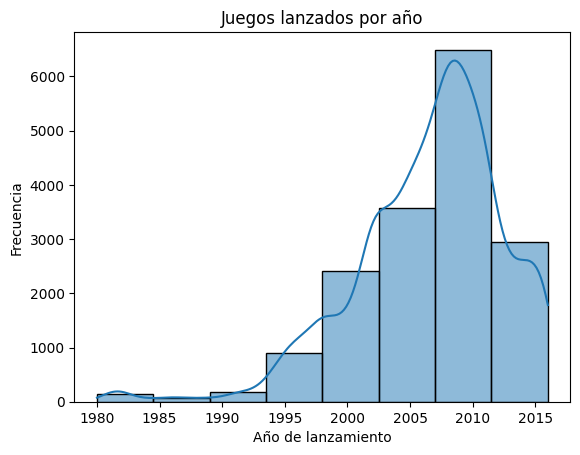

In [19]:
sns.histplot(df['year_of_release'],bins=8,kde=True)
plt.xlabel('Año de lanzamiento')
plt.ylabel('Frecuencia')
plt.title('Juegos lanzados por año')
plt.show()

In [20]:
intervalo=range(df['year_of_release'].min(),2021,5)
df['agrupado_años']=pd.cut(df['year_of_release'],bins=intervalo, right=False)
juegos_por_año= df.groupby('agrupado_años').size()
print(juegos_por_año)

agrupado_años
[1980, 1985)     139
[1985, 1990)      83
[1990, 1995)     289
[1995, 2000)    1491
[2000, 2005)    3278
[2005, 2010)    6075
[2010, 2015)    4250
[2015, 2020)    1108
dtype: int64


C:\Users\oslo_\AppData\Local\Temp\ipykernel_32208\1386856916.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  juegos_por_año= df.groupby('agrupado_años').size()


Con esto podemos ver que el auge de la venta de videojuegos fue entre 2005 y 2010, en el siguiente periodo fue una disminucion y ya en el ultimo periodo se noto la diferencia, desde mi punto de vista esto es normal, ya que apartir de 2015 cambio el formato de los videojuegos y ahora posee lo que son microcompras en el juego, que hace que un videojuego tenga más vida pero esas actualizaciones se consiguen con microcompras. 

## Ventas por plataforma

### Plataforma con más ventas totales.

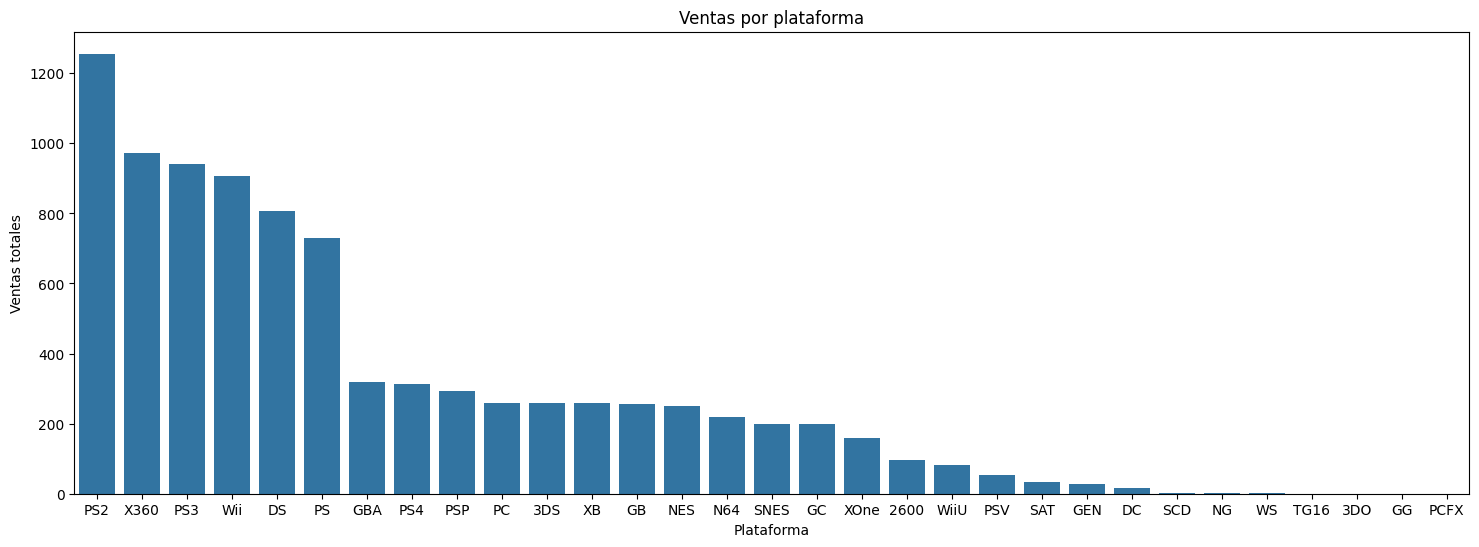

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

In [21]:
ventas_por_plataforma=df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
fig=plt.figure(figsize=(18,6))
sns.barplot(x=ventas_por_plataforma.index,y=ventas_por_plataforma.values)
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales')
plt.title('Ventas por plataforma')
plt.show()
ventas_por_plataforma

Con esta grafica observamos que historicamente la plataforma con más ventas totales es la ps2 con 1255.77 millones de ventas totales. Algo que seria interesante es ver estas ventas por region.

In [22]:
ventas_por_plataforma_por_region=df.groupby('platform')[['na_sales','eu_sales','jp_sales','other_sales','total_sales']].sum().sort_values(by='total_sales',ascending=False)
ventas_por_plataforma_por_region

,na_sales,eu_sales,jp_sales,other_sales,total_sales
platform,,,,,
PS2,583.84,339.29,139.20,193.44,1255.77
X360,602.47,270.76,12.43,85.76,971.42
PS3,393.49,330.29,80.19,135.68,939.65
Wii,496.90,262.21,69.33,79.07,907.51
DS,382.40,188.89,175.57,59.26,806.12
PS,336.52,213.61,139.82,40.91,730.86
GBA,187.54,75.25,47.33,7.73,317.85
PS4,108.74,141.09,15.96,48.35,314.14
PSP,109.17,66.68,76.78,41.42,294.05


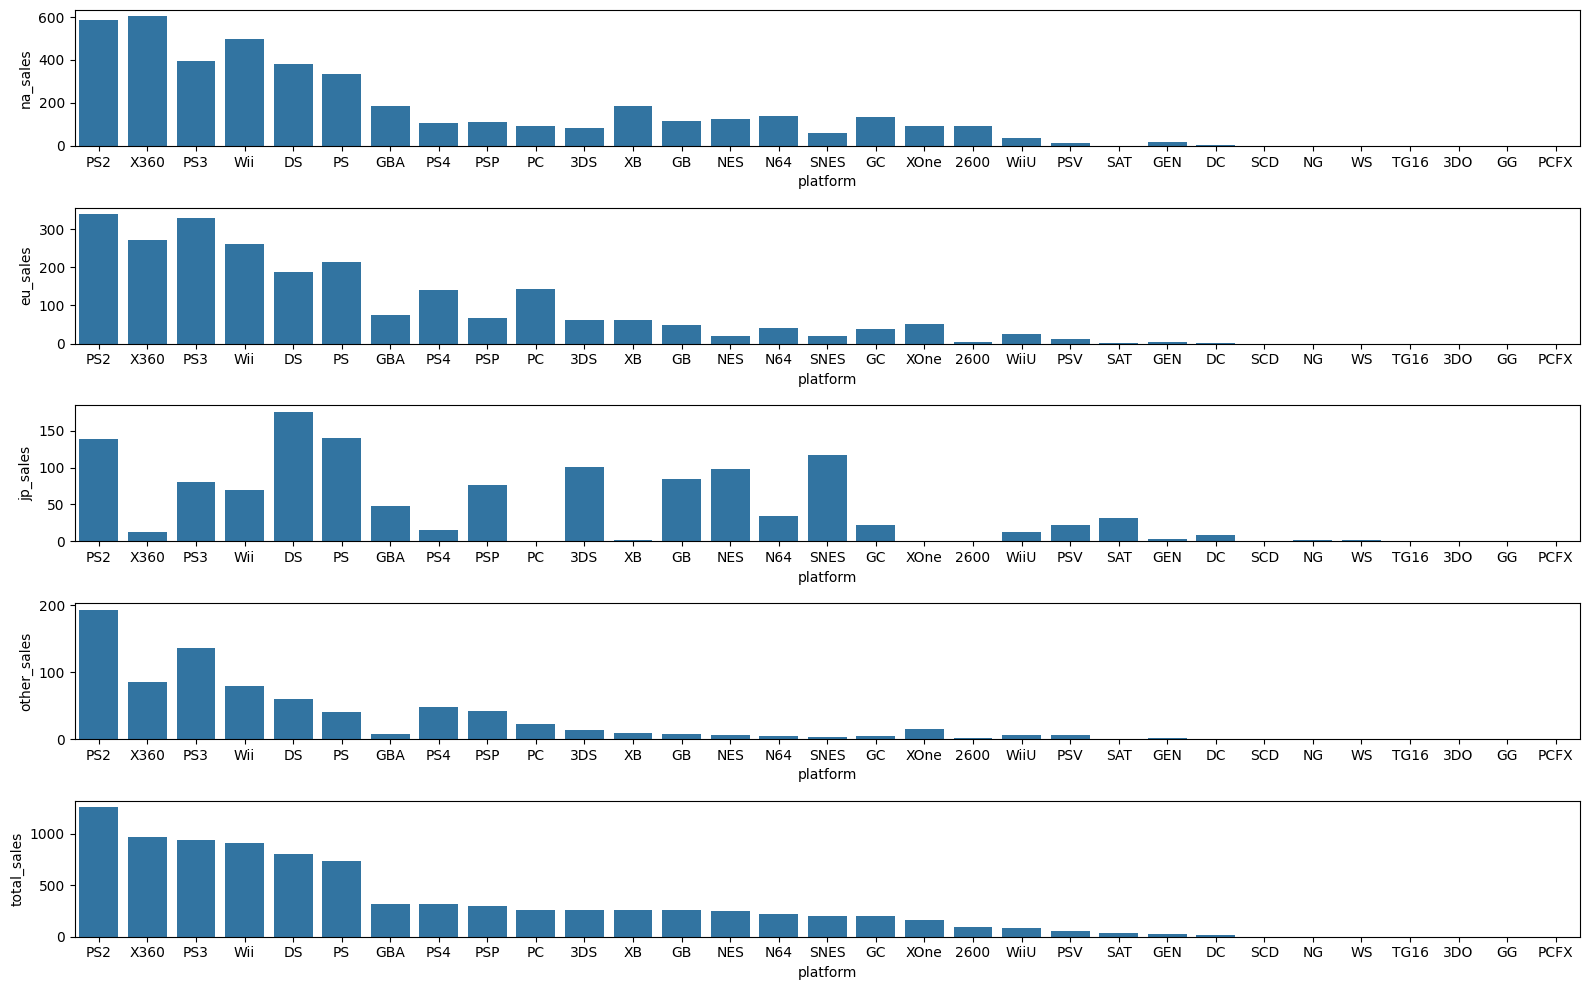

In [23]:
fig, ax=plt.subplots(5,1,figsize=(16,10))
sns.barplot(x=ventas_por_plataforma_por_region.index,y=ventas_por_plataforma_por_region['na_sales'],ax=ax[0])
sns.barplot(x=ventas_por_plataforma_por_region.index,y=ventas_por_plataforma_por_region['eu_sales'],ax=ax[1])
sns.barplot(x=ventas_por_plataforma_por_region.index,y=ventas_por_plataforma_por_region['jp_sales'],ax=ax[2])
sns.barplot(x=ventas_por_plataforma_por_region.index,y=ventas_por_plataforma_por_region['other_sales'],ax=ax[3])
sns.barplot(x=ventas_por_plataforma_por_region.index,y=ventas_por_plataforma_por_region['total_sales'],ax=ax[4])
fig.tight_layout()
plt.show()


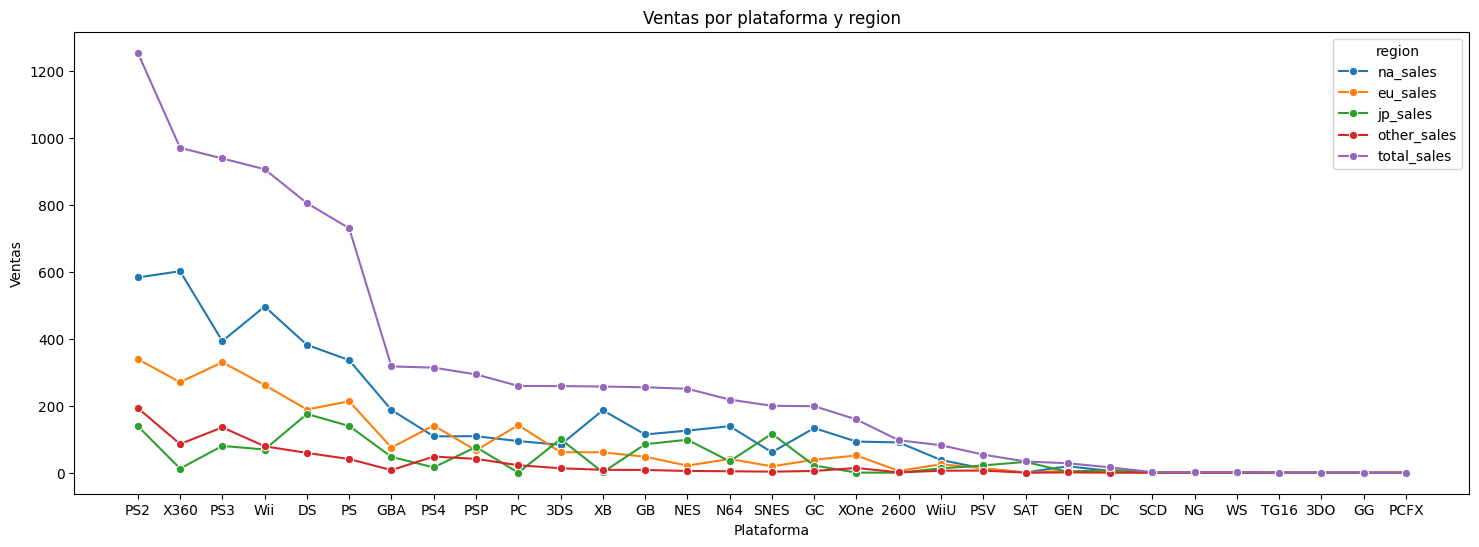

In [24]:
#Hacemos la convercion a tabla larga para poder graficarlas con hue todo en el mismo grafico, como creamos muchos valores de plataforma, pero son los mismo, se pasa el valor de plataforma como valor categorico.
ventas_por_plataforma_por_region_largo=ventas_por_plataforma_por_region.reset_index().melt(id_vars='platform',var_name='region',value_name='ventas')
ventas_por_plataforma_por_region_largo['platform']=ventas_por_plataforma_por_region_largo['platform'].astype('category')
ventas_por_plataforma_por_region_largo['platform']=ventas_por_plataforma_por_region_largo['platform'].cat.set_categories(ventas_por_plataforma_por_region.sort_values('total_sales', ascending=False).index)
plt.figure(figsize=(18, 6))
sns.lineplot(data=ventas_por_plataforma_por_region_largo, x='platform', y='ventas', hue='region', marker='o')
plt.xlabel('Plataforma')
plt.ylabel('Ventas')
plt.title('Ventas por plataforma y region')
plt.show()


Observamos que por mercado, el que tiene mayor parte de juegos vendidos es el mercado norte americano, tambien en dicho mercado se vende más consolas norteamaricanas que serian de la linea de xbox que en las otras regiones. En el mercado japones, se observa un fuerte apoyo a las consolas locales como las de nintendo y sony en genera, me llama la atencion que en ventas haya más ventas en este orden Norte amaericano, Europeo, Japones y Otras regiones.

Para proposito de otro estudio, procedere a solo analizar las primeras 10 consolas en ventas totales, esto para ver como ha sido su distribución en cada año.

In [25]:
top_10_platforms = (df.groupby(['platform'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].sum().sort_values(by='total_sales', ascending=False).head(10).copy())
print(top_10_platforms)


          na_sales  eu_sales  jp_sales  other_sales  total_sales
platform                                                        
PS2         583.84    339.29    139.20       193.44      1255.77
X360        602.47    270.76     12.43        85.76       971.42
PS3         393.49    330.29     80.19       135.68       939.65
Wii         496.90    262.21     69.33        79.07       907.51
DS          382.40    188.89    175.57        59.26       806.12
PS          336.52    213.61    139.82        40.91       730.86
GBA         187.54     75.25     47.33         7.73       317.85
PS4         108.74    141.09     15.96        48.35       314.14
PSP         109.17     66.68     76.78        41.42       294.05
PC           94.53    142.44      0.17        22.38       259.52


In [26]:
print(top_10_platforms.index)

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC'], dtype='object', name='platform')


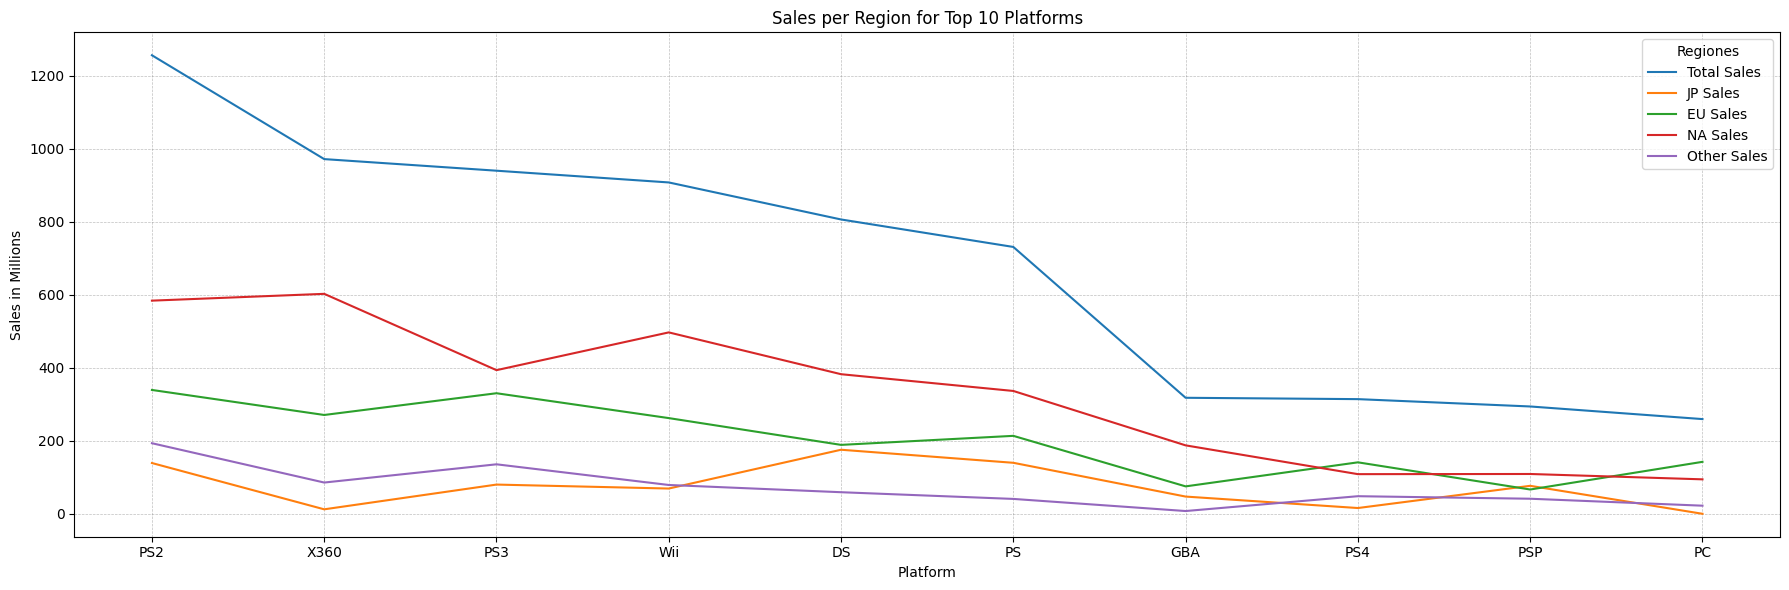

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(18, 6))

sns.lineplot(data=top_10_platforms, x='platform', y='total_sales', ax=ax, label='Total Sales')
sns.lineplot(data=top_10_platforms, x='platform', y='jp_sales', ax=ax, label='JP Sales')
sns.lineplot(data=top_10_platforms, x='platform', y='eu_sales', ax=ax, label='EU Sales')
sns.lineplot(data=top_10_platforms, x='platform', y='na_sales', ax=ax, label='NA Sales')
sns.lineplot(data=top_10_platforms, x='platform', y='other_sales', ax=ax, label='Other Sales')

ax.set_xlabel('Platform')
ax.set_ylabel('Sales in Millions')
ax.set_title('Sales per Region for Top 10 Platforms')
ax.legend(title='Regiones')
ax.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)   

fig.tight_layout()
plt.show()



<Axes: xlabel='year_of_release', ylabel='total_sales'>

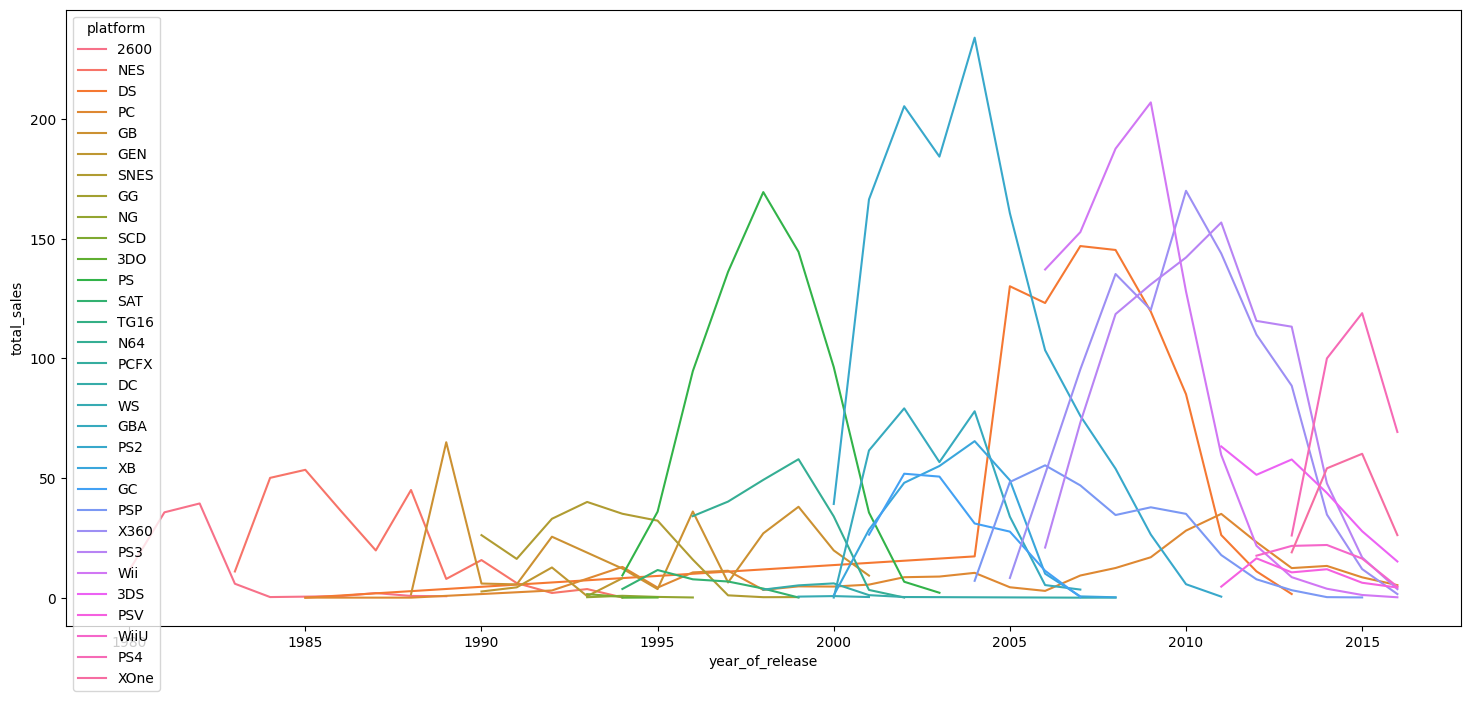

In [28]:
plataformasxaños=df.groupby(['year_of_release','platform'])['total_sales'].sum().reset_index()
plt.figure(figsize=(18, 8))
sns.lineplot(data=plataformasxaños,x='year_of_release',y='total_sales',hue='platform')


Con esta grafica podriamos ver cuando comienza y termina la era de una plataforma, sin embargo no es practico, por lo tanto solo mostraremos el periodo de las 10 consolas que más han vendido


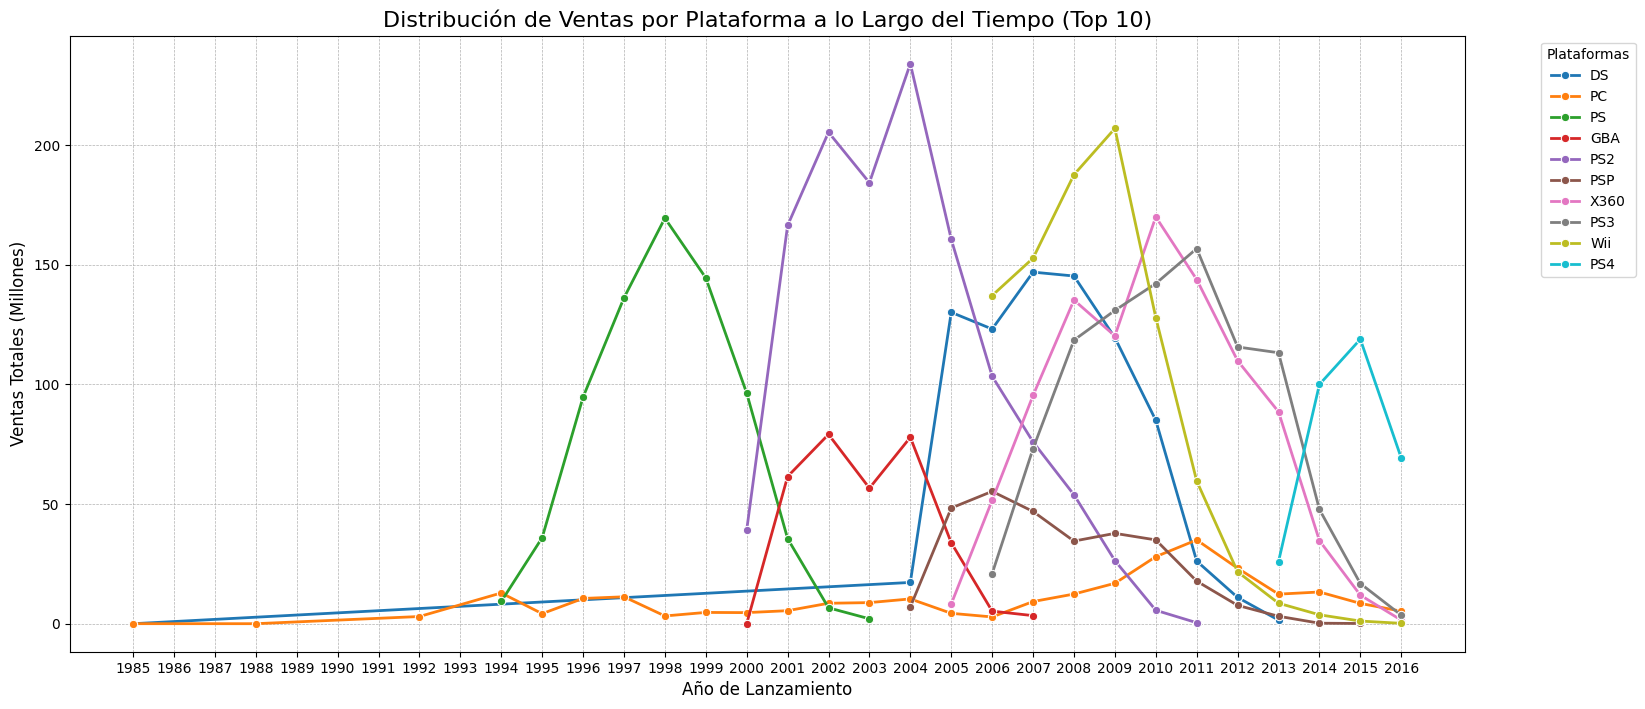

In [29]:
top_10_platforms = plataformasxaños.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10).index
plataformas_top_10 = plataformasxaños[plataformasxaños['platform'].isin(top_10_platforms)]
plt.figure(figsize=(18, 8))
sns.lineplot(data=plataformas_top_10, x='year_of_release', y='total_sales', hue='platform', marker='o', linewidth=2)
plt.title('Distribución de Ventas por Plataforma a lo Largo del Tiempo (Top 10)', fontsize=16)
plt.xlabel('Año de Lanzamiento', fontsize=12)
plt.ylabel('Ventas Totales (Millones)', fontsize=12)
plt.xticks(ticks=range(int(plataformas_top_10['year_of_release'].min()), int(plataformas_top_10['year_of_release'].max()) + 1, 1))
plt.legend(title='Plataformas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5) 



Algo que se me hace curioso es que todas las generaciones de PlayStation esten en el top 10 de ventas, por ejemplo esta el PS4 pero no XONE, que seria la competencia directa.

Con esto podemos ver que la mayoria de las consolas tienen un comportamiento similar, donde sus ventas suben y hasta que llegan a su pico de venta comienzan a bajar, por ejemplo en el caso de ps2 que es la que más vendio comienza en 2000 y termina en 2011, cerca de 11 años vendiendo juegos. Obseervamos tambien que la mayoria de las consolas tienen un tiempo promedio de vida de 11 años, a excepcion de la PC, ya que ella seguira existiendo, ya que solo se actualiza el hardware del usuaerio para que no quede obsoleta.

Hagamos un experimento de extrapolacion para los datos del 2017,

Observamos que efectivamente el ultimo dato es de 2016, entonces usaremos de esos datos que tenemos menos 10 años para atras, esto para ver si nos sirve para una proyeccion.

                                 name platform  year_of_release         genre  na_sales  eu_sales  jp_sales  other_sales  total_sales  critic_score  user_score rating agrupado_años
16                 Grand Theft Auto V      PS3             2013        Action      7.02      9.09      0.98         3.96        21.05          97.0         8.2      M  [2010, 2015)
23                 Grand Theft Auto V     X360             2013        Action      9.66      5.14      0.06         1.41        16.27          97.0         8.1      M  [2010, 2015)
29     Call of Duty: Modern Warfare 3     X360             2011       Shooter      9.04      4.24      0.13         1.32        14.73          88.0         3.4      M  [2010, 2015)
31          Call of Duty: Black Ops 3      PS4             2015       Shooter      6.03      5.86      0.36         2.38        14.63          71.0         7.5    NaN  [2015, 2020)
33                Pokemon X/Pokemon Y      3DS             2013  Role-Playing      5.28      4.

C:\Users\oslo_\AppData\Local\Temp\ipykernel_32208\3730805541.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_reciente, x='year_of_release', y='total_sales', hue='platform',ci=None)


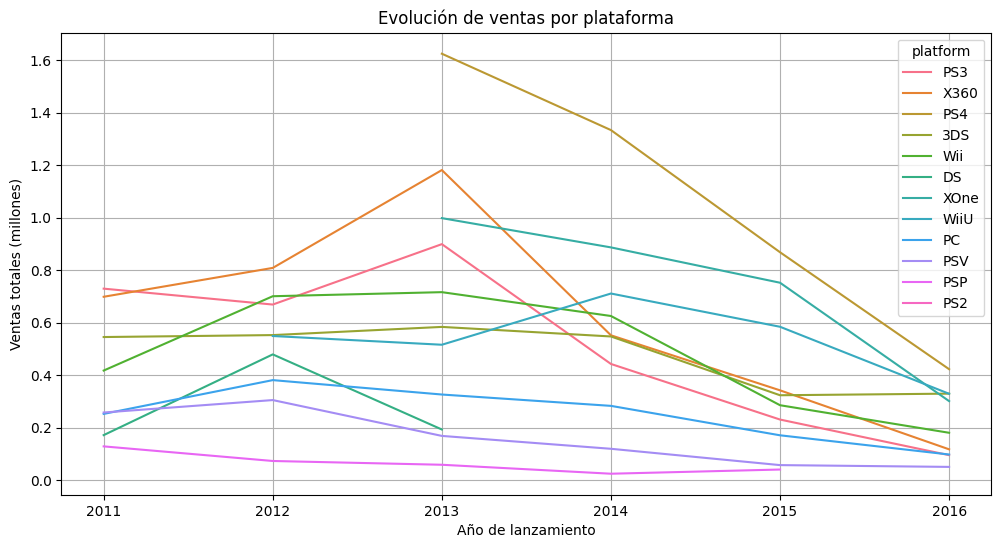

In [30]:
comienzoestudio = df['year_of_release'].max()- 5  # Última década
df_reciente = df[df['year_of_release'] >= comienzoestudio]
print(df_reciente)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_reciente, x='year_of_release', y='total_sales', hue='platform',ci=None)
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales (millones)')
plt.title('Evolución de ventas por plataforma')
plt.grid(True)
plt.show()

Con la grafica podemos estimar que las que estan mas abajo en el periodo de 2016 seguiran una tendencia bajista y por lo tanto tendran más posibilidades de desaparecer. las que se podrian salvar serian PS4, DS y XONE, aunque ya ninguna esta en su peridodo más alto, todas vienen ya cayendo, por lo que podriamos considerar que ya esta cerca un nuevo lanzamiento de la nueva generacion de consolas.

## ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

In [31]:
ventas_por_plataforma_por_region

,na_sales,eu_sales,jp_sales,other_sales,total_sales
platform,,,,,
PS2,583.84,339.29,139.20,193.44,1255.77
X360,602.47,270.76,12.43,85.76,971.42
PS3,393.49,330.29,80.19,135.68,939.65
Wii,496.90,262.21,69.33,79.07,907.51
DS,382.40,188.89,175.57,59.26,806.12
PS,336.52,213.61,139.82,40.91,730.86
GBA,187.54,75.25,47.33,7.73,317.85
PS4,108.74,141.09,15.96,48.35,314.14
PSP,109.17,66.68,76.78,41.42,294.05


Las plataformas que son historicamente lideres en venta son de la linea Playstation de Sony, la linea de portatiles de Nintendo y las consolas de Microsoft Xbox.

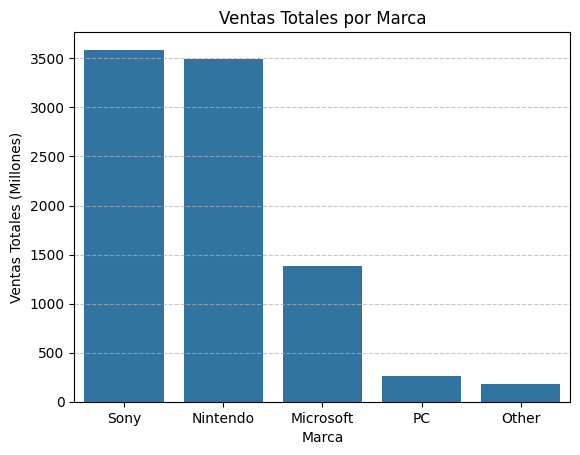

In [32]:

#HAcemos una funcion para agrupar las plataformas por marcas.
def asignar_marca(df):

    marcas = {
    'PS2': 'Sony', 'PS3': 'Sony', 'PS4': 'Sony', 'PSP': 'Sony', 'PS': 'Sony', 'PSV': 'Sony',
    'X360': 'Microsoft', 'XOne': 'Microsoft', 'XB': 'Microsoft',
    'Wii': 'Nintendo', 'DS': 'Nintendo', '3DS': 'Nintendo', 'GB': 'Nintendo', 
    'NES': 'Nintendo', 'N64': 'Nintendo', 'SNES': 'Nintendo', 'GC': 'Nintendo', 
    'WiiU': 'Nintendo', 'GBA': 'Nintendo',
    'PC': 'PC' 
}

    df['brand'] = df['platform'].map(marcas).fillna('Other')
    return df

df = asignar_marca(df)
df.sample(5)

ventas_por_marca=df.groupby('brand',as_index=False)['total_sales'].sum().sort_values('total_sales',ascending=False)
sns.barplot(data=ventas_por_marca, x='brand', y='total_sales')
plt.xlabel('Marca')
plt.ylabel('Ventas Totales (Millones)')
plt.title('Ventas Totales por Marca')
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.show()

Con esta grafica vemos que historicamente a lo largo de los años, Sony y Nintendo van casi de la mano en ventas. En el caso de Nintendo seria de esperarse ya que es una de las marcas que historicamente ha desarrollado videojuegos desde sus primeras consolas. En el caso de Sony, es impresionante al no ser una consola "Vieja" pueda superar en ventas historicas a nintendo.

## Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

Text(0.5, 1.0, 'Boxplot de Ventas Totales por Plataforma')

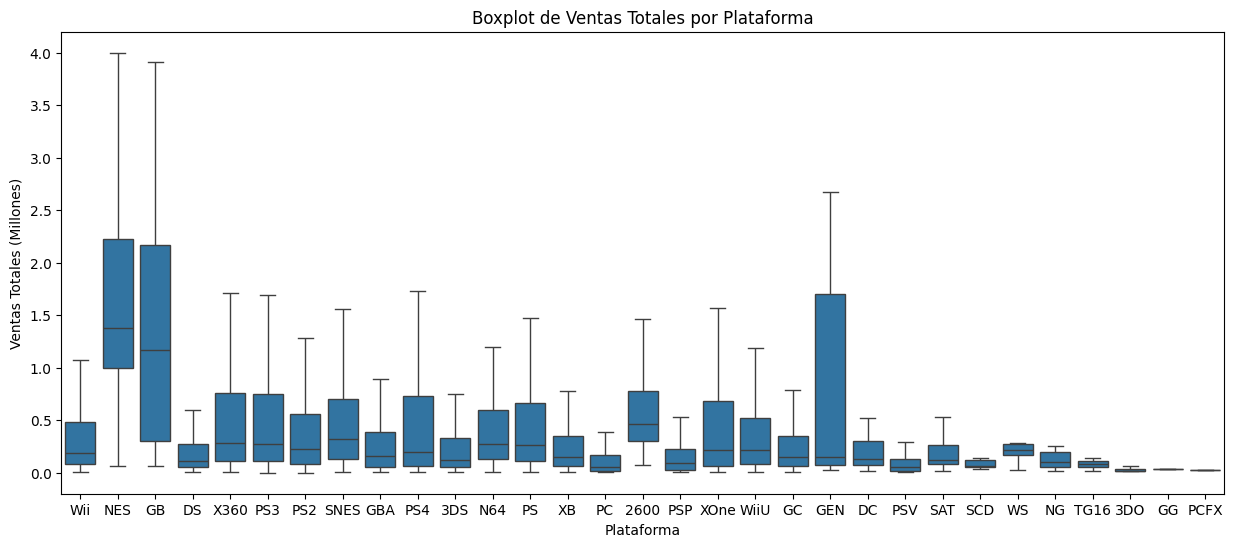

In [33]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='platform', y='total_sales',showfliers=False)
plt.xlabel('Plataforma')    
plt.ylabel('Ventas Totales (Millones)')
plt.title('Boxplot de Ventas Totales por Plataforma')

Con la anterior grafica podemos ver que es más probable que un juego de NES ,GB y GEN tenga más ventas de los juegos que lanzan (No necesariamente son los que ganan más si no de los juegos que llegan a lanzar tienen esa probailidad de generar más ventas). Este grafico se creo ommitiendo los valores atipicos. A continuacion se mostrara como seria con valores atipicos.

Text(0.5, 1.0, 'Boxplot de Ventas Totales por Plataforma con valores atipicos')

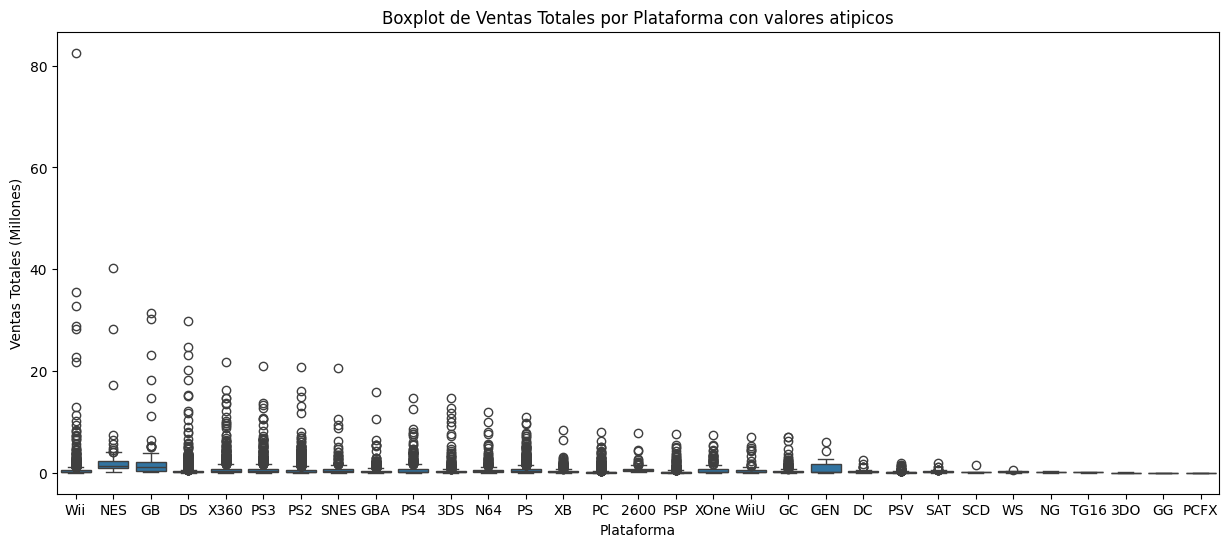

In [34]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='platform', y='total_sales')
plt.xlabel('Plataforma')    
plt.ylabel('Ventas Totales (Millones)')
plt.title('Boxplot de Ventas Totales por Plataforma con valores atipicos')

In [35]:
print(df[df['total_sales']>40])

                name platform  year_of_release     genre  na_sales  eu_sales  jp_sales  other_sales  total_sales  critic_score  user_score rating agrupado_años     brand
0         Wii Sports      Wii             2006    Sports     41.36     28.96      3.77         8.45        82.54          76.0         8.0      E  [2005, 2010)  Nintendo
1  Super Mario Bros.      NES             1985  Platform     29.08      3.58      6.81         0.77        40.24          71.0         7.5    NaN  [1985, 1990)  Nintendo


Con esto podemos concluir algunas cosas, que muy pocos juegos son los que venden mucho en cada plataforma.
Hisotricamente solo hay dos juegos que han roto records de ventas, uno es Wii sport con ventas totales de 82.54 millones y el que le sigue es Super Mario Bros con 40.24 millones.

Cuando analizamos asi podemos ver que las consolas viejas tienen más probabilidades de lanzar un videojuego y que fuera un exito en ventas a diferencia de las consolas actuales, que si pueden vender más pero esto lo compesnan con más numero de juegos.

## Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

Ya que PS2 es la plataforma con mayores ventas en el mercado, vamos a ver como afectan las ventas de la plataforma con respecto a las reseñas de los usuarios y los profesionales.

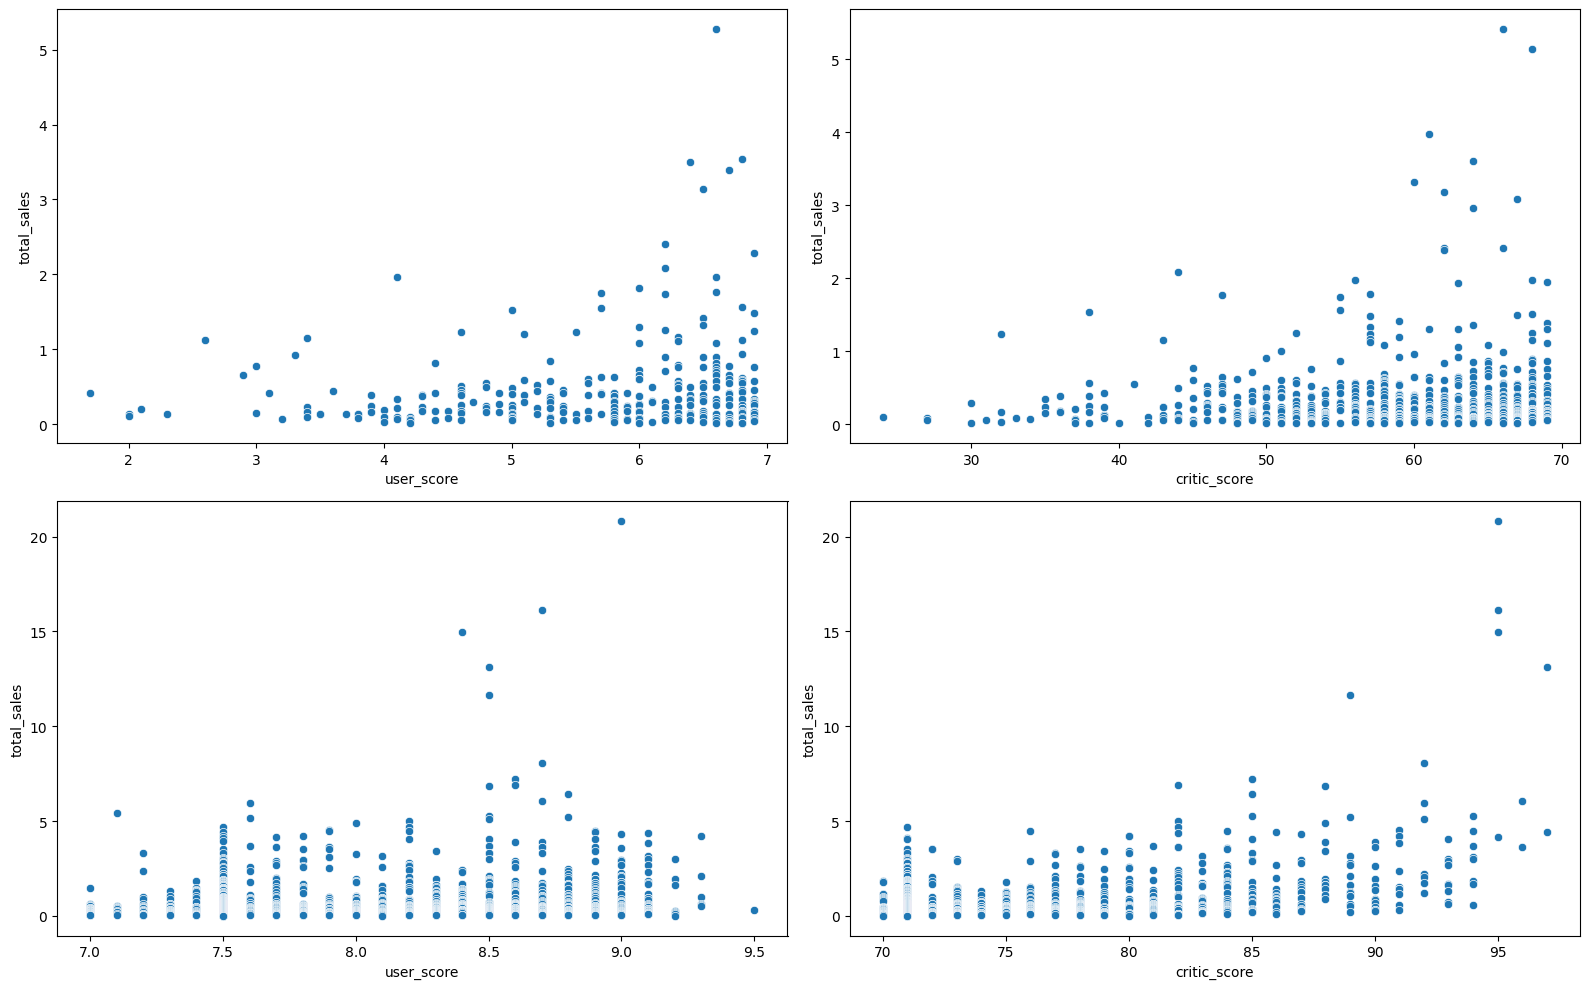

In [36]:
playstation_mala_critica_usuario = df[(df['user_score'] < 7) & (df['platform'] == 'PS2')].reset_index().copy()
playstation_mala_critica_critico = df[(df['critic_score'] < 70) & (df['platform'] == 'PS2')].reset_index().copy()
playstation_buena_critica_usuario= df[(df['user_score'] >= 7) & (df['platform'] == 'PS2')].reset_index().copy()
playstation_buena_critica_critico= df[(df['critic_score'] >= 70) & (df['platform'] == 'PS2')].reset_index().copy()
fig, ax = plt.subplots(2, 2, figsize=(16, 10))
sns.scatterplot(data=playstation_mala_critica_usuario, x='user_score', y='total_sales', ax=ax[0, 0])
sns.scatterplot(data=playstation_mala_critica_critico, x='critic_score', y='total_sales', ax=ax[0, 1])
sns.scatterplot(data=playstation_buena_critica_usuario, x='user_score', y='total_sales', ax=ax[1, 0])
sns.scatterplot(data=playstation_buena_critica_critico, x='critic_score', y='total_sales', ax=ax[1, 1])
plt.tight_layout()

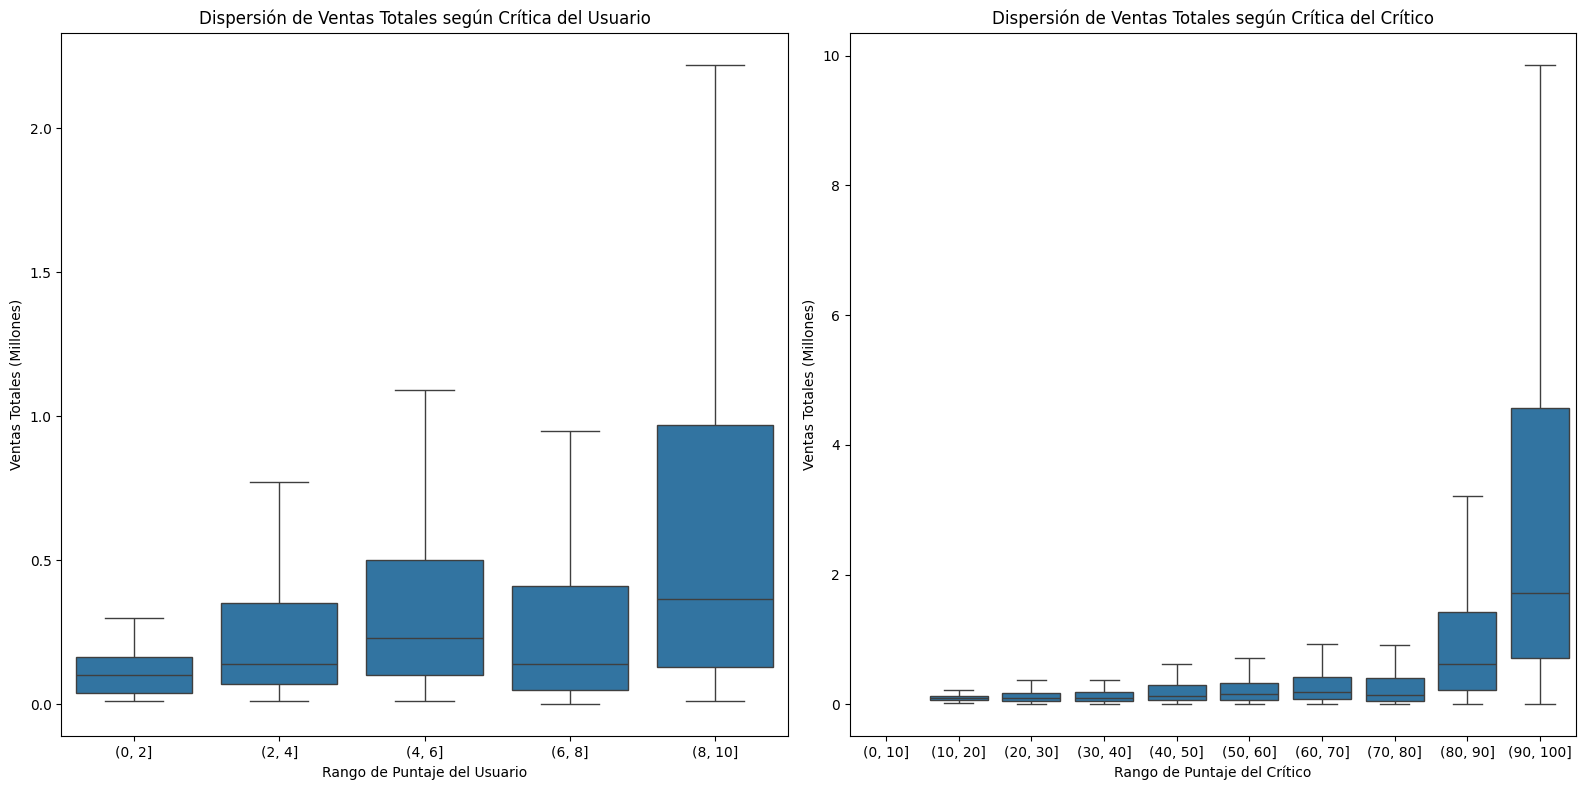

category


In [37]:
df['user_score_agrupado'] = pd.cut(df['user_score'], bins=range(0, 11, 2))


df['critic_score_agrupado'] = pd.cut(df['critic_score'], bins=range(0, 101, 10))
# Crear figura y subgráficos para los dos diagramas de caja
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

sns.boxplot(data=df, x='user_score_agrupado', y='total_sales', ax=ax[0], showfliers=False)
ax[0].set_title('Dispersión de Ventas Totales según Crítica del Usuario')
ax[0].set_xlabel('Rango de Puntaje del Usuario')
ax[0].set_ylabel('Ventas Totales (Millones)')

sns.boxplot(data=df, x='critic_score_agrupado', y='total_sales', ax=ax[1], showfliers=False)
ax[1].set_title('Dispersión de Ventas Totales según Crítica del Crítico')
ax[1].set_xlabel('Rango de Puntaje del Crítico')
ax[1].set_ylabel('Ventas Totales (Millones)')


# Ajustar el layout
plt.tight_layout()

# Mostrar los gráficos
plt.show()
print(df['critic_score_agrupado'].dtype)

Si se observa que entre más valoracion tenga la puntacion del usuario o de la critica profesional el juego va a tener mas ventas, se ve más nototio en la critica de la critica. Ahora veremos la correlacion entre las ventas y la critica.

Ahora procederemos a ver si esta relacion es significativa en todas las plataformas.

In [38]:
correlacion_usuario = df[['user_score', 'total_sales']].corr().iloc[0,1]
correlacion_critico = df[['critic_score', 'total_sales']].corr().iloc[0,1]
print(f"Correlación entre la crítica del usuario y las ventas: {correlacion_usuario:.2f}")
print(f"Correlación entre la crítica del crítico y las ventas: {correlacion_critico:.2f}")

print(correlacion_critico)
print(correlacion_usuario)


Correlación entre la crítica del usuario y las ventas: 0.05
Correlación entre la crítica del crítico y las ventas: 0.19
0.18977684368546524
0.04876816640594389


Que haya un valor de cercano 0 nos indica que noe stan relacionadas la critica con respecto a las ventas totales, esto es importante aclarar que es para todas las plataformas en general.

Volviendo al ejemplo de PS2, veamos si hay correlacion en esta plataforma.


In [39]:
playstation_critica_usuario = df[(df['platform'] == 'PS2')].reset_index().copy()
playstation_critica_critico = df[(df['platform'] == 'PS2')].reset_index().copy()
correlacion_usuario = playstation_critica_usuario[['user_score', 'total_sales']].corr().iloc[0,1]
correlacion_critico = playstation_critica_critico[['critic_score', 'total_sales']].corr().iloc[0,1]
print(f"Correlación entre la crítica del usuario y las ventas: {correlacion_usuario:.2f}")
print(f"Correlación entre la crítica del crítico y las ventas: {correlacion_critico:.2f}")


Correlación entre la crítica del usuario y las ventas: 0.17
Correlación entre la crítica del crítico y las ventas: 0.35


Aun asi observamos que no es tan alta la relacion, en la parte de lso criticos es mayor, pero aun no es suficiente para determinar que sus ventas se deban a la critica.

### Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

                               name platform  year_of_release     genre  na_sales  eu_sales  jp_sales  other_sales  total_sales  critic_score  user_score rating agrupado_años      brand user_score_agrupado critic_score_agrupado
3862           Frozen: Olaf's Quest       DS             2013  Platform      0.21      0.26      0.00         0.04         0.51          71.0         7.5    NaN  [2010, 2015)   Nintendo              (6, 8]              (70, 80]
3358           Frozen: Olaf's Quest      3DS             2013  Platform      0.27      0.27      0.00         0.05         0.59          71.0         7.5    NaN  [2010, 2015)   Nintendo              (6, 8]              (70, 80]
14658        007: Quantum of Solace       PC             2008    Action      0.01      0.01      0.00         0.00         0.02          70.0         6.3      T  [2005, 2010)         PC              (6, 8]              (60, 70]
9507         007: Quantum of Solace       DS             2008    Action      0.11      0

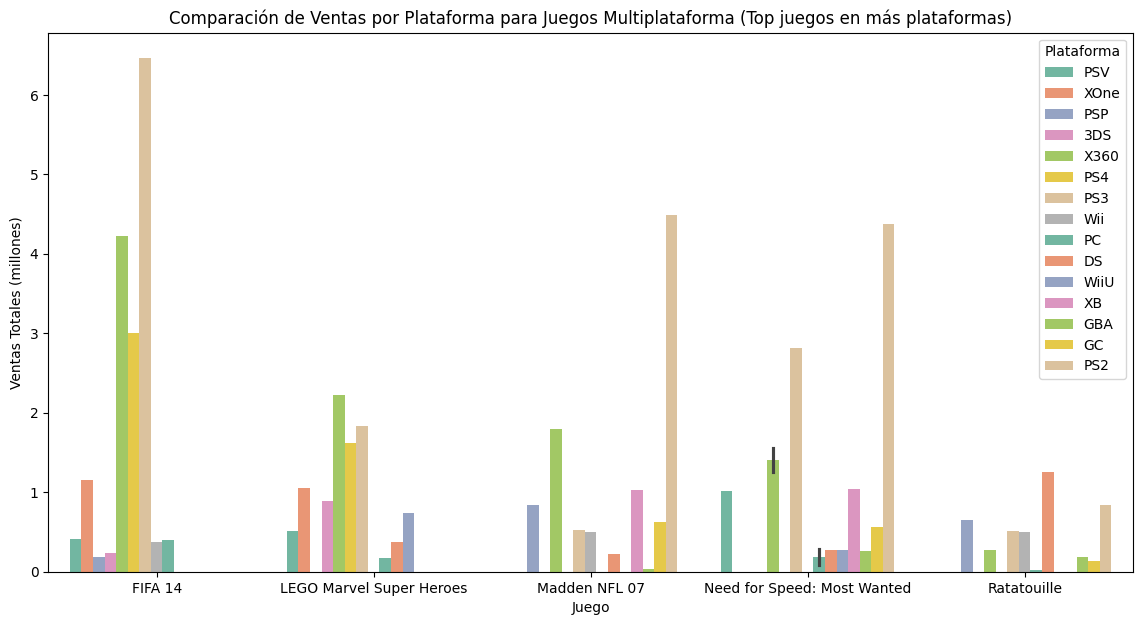

In [40]:
juegos_multiplataforma=df[df['name'].duplicated(keep=False)].sort_values(by=['name']).copy()
print(juegos_multiplataforma)
nombredejuegosmulti=juegos_multiplataforma['name'].unique()
print(nombredejuegosmulti)
print(len(nombredejuegosmulti))
#Obtenemos los 5 juegos con más plataformas esto para comparar unas con otras
agrupado=juegos_multiplataforma.groupby('name')['platform'].nunique().sort_values(ascending=False).head(5).copy().index
agrupado = list(agrupado)
print(agrupado)

top_multiplataformas=juegos_multiplataforma[juegos_multiplataforma['name'].isin(agrupado)]
plt.figure(figsize=(14, 7))
sns.barplot(data=top_multiplataformas, x='name', y='total_sales', hue='platform',palette="Set2")
plt.title("Comparación de Ventas por Plataforma para Juegos Multiplataforma (Top juegos en más plataformas)")
plt.xlabel("Juego")
plt.ylabel("Ventas Totales (millones)")
plt.legend(title="Plataforma")
plt.show()


Observamos que no van de la mano, aunque sea el mismo juego, este no se comporta igual en las diferentes plataformas. Este estudio se hizo con los 5 juegos con más plataformas.

Ahora haremos con los juegos multiplataforma que vendieron más.

['Grand Theft Auto V', 'Super Mario Bros.', 'Tetris', 'Call of Duty: Black Ops', 'Call of Duty: Modern Warfare 3']


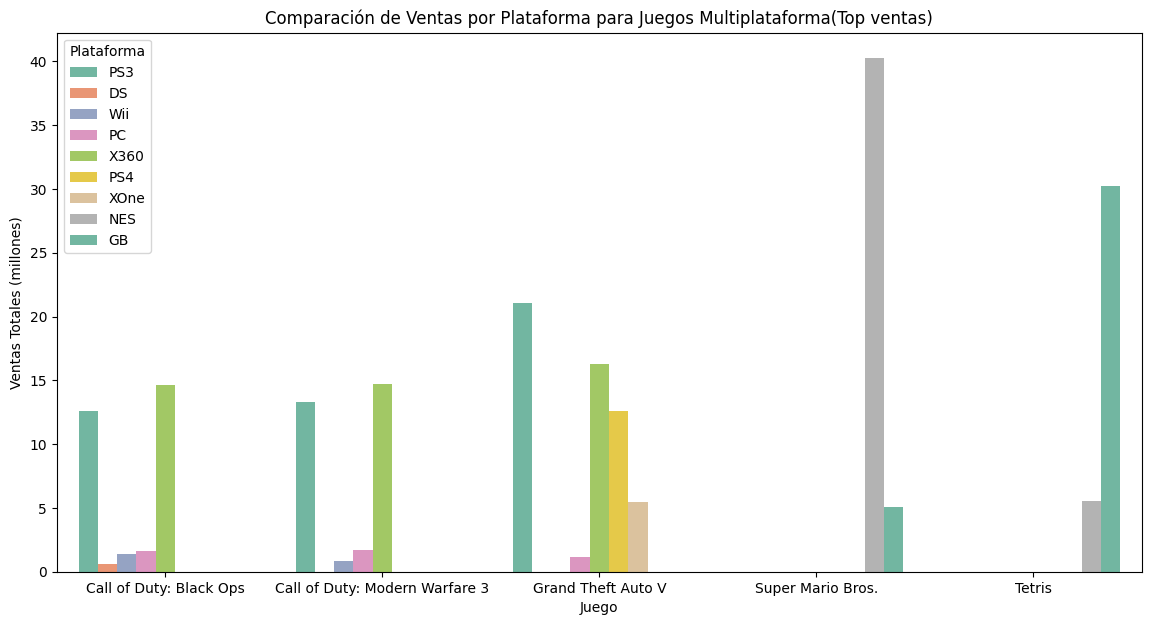

In [41]:
agrupado=juegos_multiplataforma.groupby('name')['total_sales'].sum().sort_values(ascending=False).head(5).copy().index
agrupado = list(agrupado)
print(agrupado)

top_multiplataformas=juegos_multiplataforma[juegos_multiplataforma['name'].isin(agrupado)]
plt.figure(figsize=(14, 7))
sns.barplot(data=top_multiplataformas, x='name', y='total_sales', hue='platform',palette="Set2")
plt.title("Comparación de Ventas por Plataforma para Juegos Multiplataforma(Top ventas)")
plt.xlabel("Juego")
plt.ylabel("Ventas Totales (millones)")
plt.legend(title="Plataforma")
plt.show()

In [42]:
print(juegos_multiplataforma[juegos_multiplataforma['name']=='Super Mario Bros.'])
print(juegos_multiplataforma[juegos_multiplataforma['name']=='Tetris'])

                  name platform  year_of_release     genre  na_sales  eu_sales  jp_sales  other_sales  total_sales  critic_score  user_score rating agrupado_años     brand user_score_agrupado critic_score_agrupado
1    Super Mario Bros.      NES             1985  Platform     29.08      3.58      6.81         0.77        40.24          71.0         7.5    NaN  [1985, 1990)  Nintendo              (6, 8]              (70, 80]
201  Super Mario Bros.       GB             1999  Platform      3.40      1.30      0.15         0.22         5.07          71.0         7.5    NaN  [1995, 2000)  Nintendo              (6, 8]              (70, 80]
       name platform  year_of_release   genre  na_sales  eu_sales  jp_sales  other_sales  total_sales  critic_score  user_score rating agrupado_años     brand user_score_agrupado critic_score_agrupado
157  Tetris      NES             1988  Puzzle      2.97      0.69      1.81         0.11         5.58          71.0         7.5    NaN  [1985, 1990)  Nintend

Observamos que el el caso de juegos modernos esta mas polarizada la venta donde o es de microsoft o de Sony, en el caso de los dos ultimos es un caso especial entre mismas marcas pero diferente plataforma, y se ve muy grande la diferencia entre uno y otro, yo considero que tiene que ver la diferencia de fecha de lanzam,iento uno de 1985 y otro de 1999.

### ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

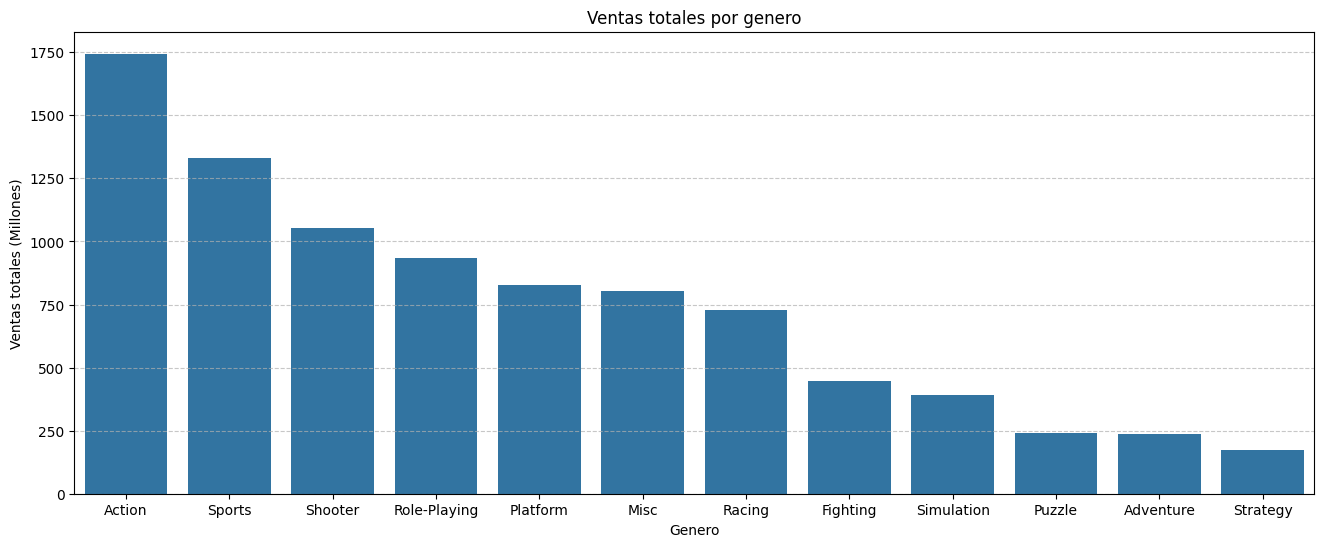

In [43]:
generos=df.groupby('genre')['total_sales'].sum().sort_values(ascending=False).copy().reset_index()
fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(data=generos, x='genre', y='total_sales')
plt.xlabel('Genero')
plt.ylabel('Ventas totales (Millones)')
plt.title('Ventas totales por genero')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Por la grafica anterior donde poniamos los juegos multiplataformas mas vendidos, se venia asomando ya el genero más rentable de los videojuegos que es el de Action, lo que sorprende es que apesar de que Super Mario Bros es historicamente el juego con más copias vendidas. su genero queda a la mitad dentro de los generos con más ventas. Veamos si esto siempre ha sido asi, si el genero de accion a lo largo del tiempo siempre ha sido un genero con muchas ventas.

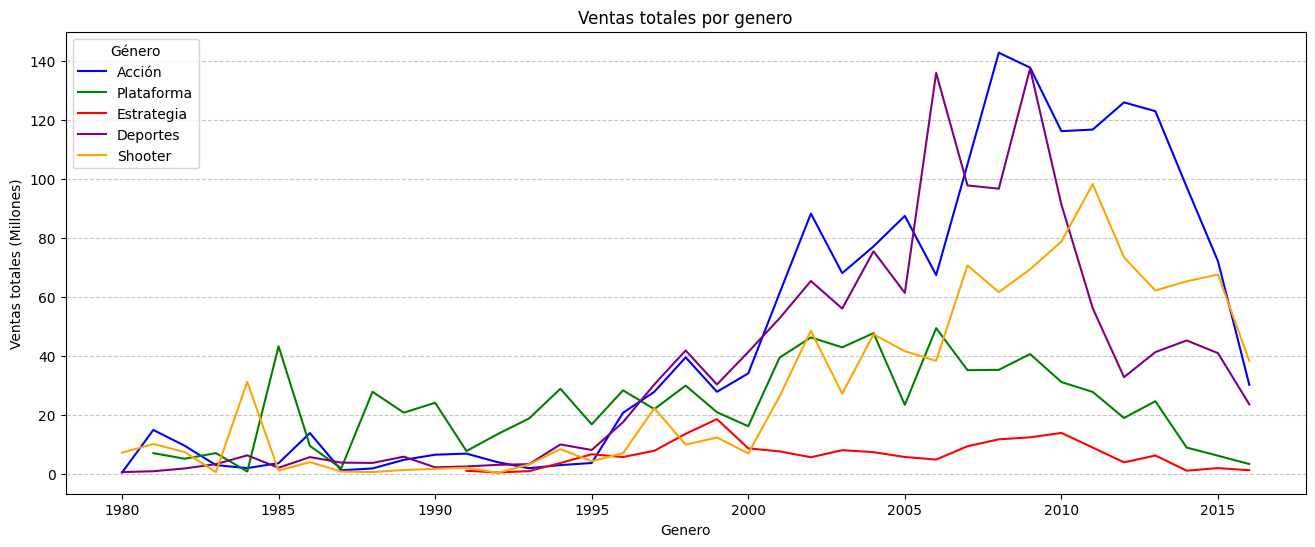

In [44]:
genero_acion=df[df['genre']=='Action']
genero_acion=genero_acion.groupby('year_of_release')['total_sales'].sum().sort_values(ascending=False).copy().reset_index()
genero_platform=df[df['genre']=='Platform']
genero_platform=genero_platform.groupby('year_of_release')['total_sales'].sum().sort_values(ascending=False).copy().reset_index()
genero_estrategia = df[df['genre'] == 'Strategy'].groupby('year_of_release')['total_sales'].sum().sort_values(ascending=False).reset_index()
genero_sports = df[df['genre'] == 'Sports'].groupby('year_of_release')['total_sales'].sum().sort_values(ascending=False).reset_index()
genero_shooter = df[df['genre'] == 'Shooter'].groupby('year_of_release')['total_sales'].sum().sort_values(ascending=False).reset_index()
fig, ax = plt.subplots(figsize=(16, 6))
sns.lineplot(data=genero_acion, x='year_of_release', y='total_sales', label='Acción', color='blue')
sns.lineplot(data=genero_platform, x='year_of_release', y='total_sales', label='Plataforma', color='green')
sns.lineplot(data=genero_estrategia, x='year_of_release', y='total_sales', label='Estrategia', color='red')
sns.lineplot(data=genero_sports, x='year_of_release', y='total_sales', label='Deportes', color='purple')
sns.lineplot(data=genero_shooter, x='year_of_release', y='total_sales', label='Shooter', color='orange')
plt.xlabel('Genero')
plt.ylabel('Ventas totales (Millones)')
plt.title('Ventas totales por genero')
plt.legend(title='Género')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Lo que podemos observar es que los juegos de plataforma  antes en los años 90's tenian el dominio sobre otros genero, pero al paso del tiempo tuvo un pequeño crecimiento a comparacion de Deportes o acción que son los generos que lideran la industria actualmente. Seria interesante cual sera el genero más popular en 20 años.

# Crea un perfil de usuario para cada región

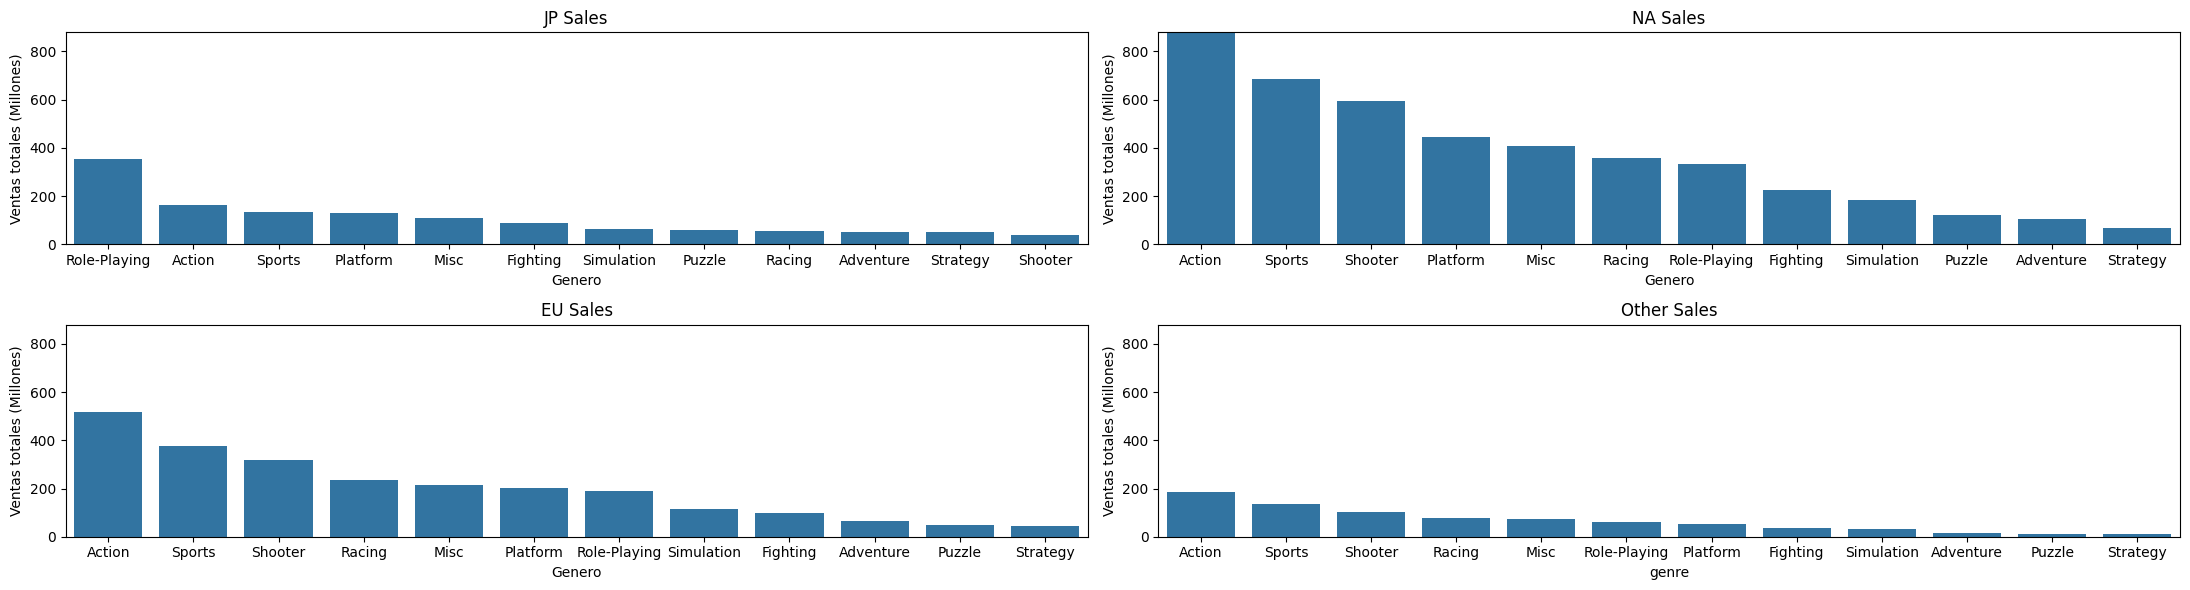

In [45]:
jp_genero=df[df['jp_sales']>0]
jp_genero=jp_genero.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).copy().reset_index()
na_genero=df[df['na_sales']>0]
na_genero=na_genero.groupby('genre')['na_sales'].sum().sort_values(ascending=False).copy().reset_index()
eu_genero=df[df['eu_sales']>0]
eu_genero=eu_genero.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).copy().reset_index()
other_genero=df[df['other_sales']>0]
other_genero=other_genero.groupby('genre')['other_sales'].sum().sort_values(ascending=False).copy().reset_index()
fig, ax = plt.subplots(2, 2, figsize=(22, 6))

max_ventas = max(jp_genero['jp_sales'].max(), na_genero['na_sales'].max(),
                 eu_genero['eu_sales'].max(), other_genero['other_sales'].max())

sns.barplot(data=jp_genero, x='genre', y='jp_sales', ax=ax[0, 0])
ax[0, 0].set_title('JP Sales')
ax[0, 0].set_xlabel('Genero')   
ax[0, 0].set_ylabel('Ventas totales (Millones)')

sns.barplot(data=na_genero, x='genre', y='na_sales', ax=ax[0, 1])
ax[0, 1].set_title('NA Sales')
ax[0, 1].set_xlabel('Genero')   
ax[0, 1].set_ylabel('Ventas totales (Millones)')

sns.barplot(data=eu_genero, x='genre', y='eu_sales', ax=ax[1, 0])
ax[1, 0].set_title('EU Sales')
ax[1, 0].set_title('EU Sales')
ax[1, 0].set_xlabel('Genero')   
ax[1, 0].set_ylabel('Ventas totales (Millones)')

sns.barplot(data=other_genero, x='genre', y='other_sales', ax=ax[1, 1])
ax[1,1].set_title('Other Sales')
ax[1, 1].set_title('Other Sales')
ax[1,1].set_ylabel('Ventas totales (Millones)')

#Fijamos el eje y para que sea el mismo en las 4 y no perder la perspectiva.
ax[0, 0].set_ylim(0, max_ventas)
ax[0, 1].set_ylim(0, max_ventas)
ax[1, 0].set_ylim(0, max_ventas)
ax[1, 1].set_ylim(0, max_ventas)

fig.tight_layout()

Es interesante ver que solo en el mercado japones las principales ventas son llevadas por el genero de Role_Playing, esto me imaginaba que seria comun por el tema de que en Japon es muy popular este genero. Fuera de esta situación, se observa un comportamiento similar con las ventas y los generos, donde los jeugos de Action y Sport son los que llevan los primeros lugares. Otra cosa que me llama poderosamente la atención es que solo en el mercado japones el genero Shooter esta hasta el ultimo en ventas, y en las demas regiones es el tercer gnero con más ventas.


 ##  Las clasificaciones de ESRB afectan a las ventas en regiones individuales.

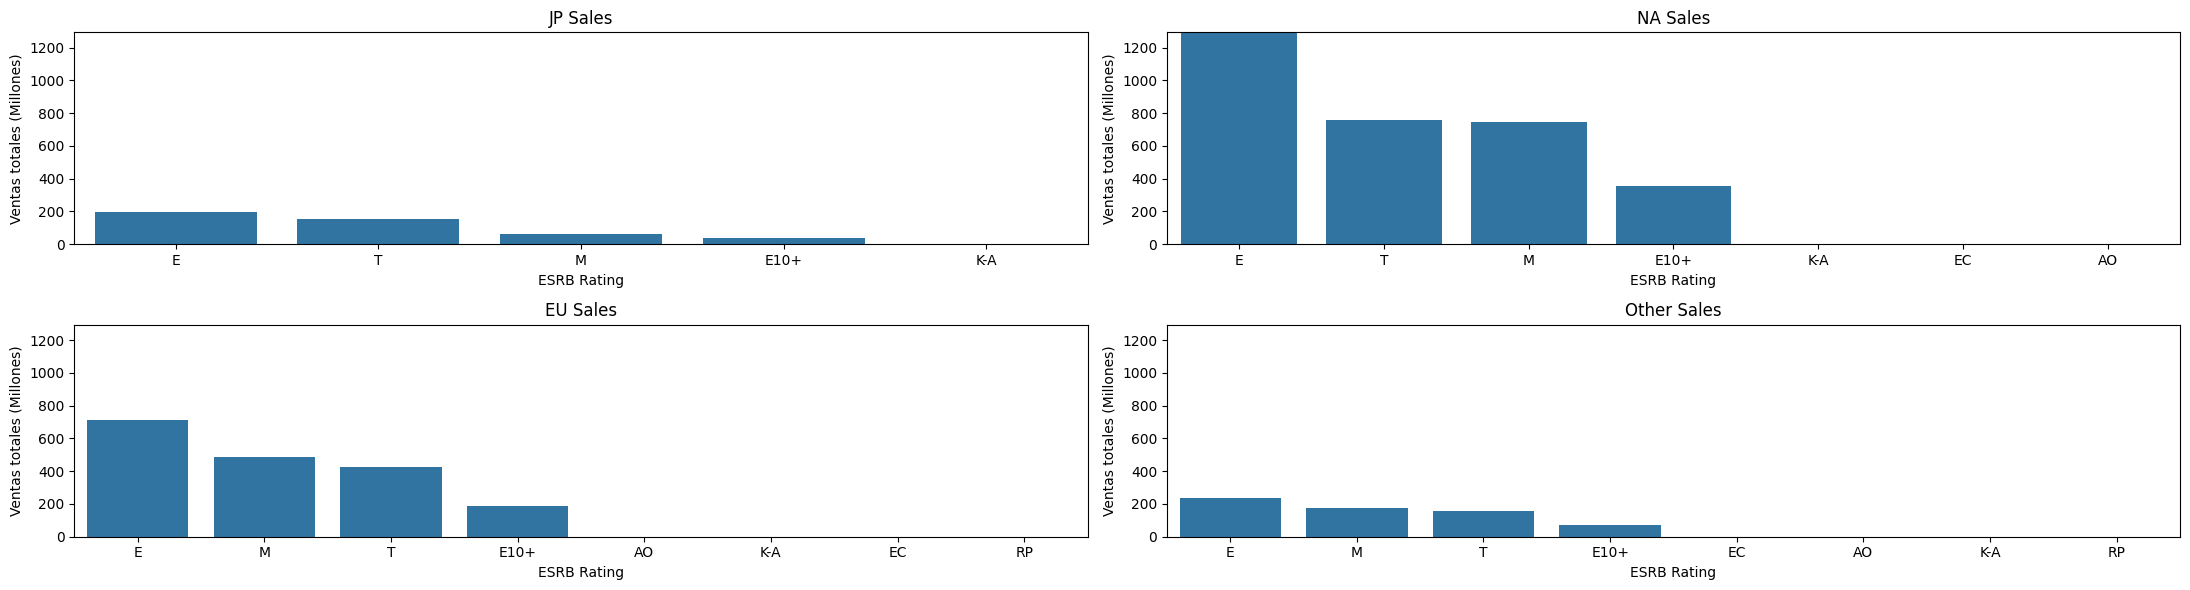

In [46]:
jp_esrb=df[df['jp_sales']>0].groupby('rating')['jp_sales'].sum().sort_values(ascending=False).copy().reset_index()
na_esrb=df[df['na_sales']>0].groupby('rating')['na_sales'].sum().sort_values(ascending=False).copy().reset_index()
eu_esrb=df[df['eu_sales']>0].groupby('rating')['eu_sales'].sum().sort_values(ascending=False).copy().reset_index()
other_esrb=df[df['other_sales']>0].groupby('rating')['other_sales'].sum().sort_values(ascending=False).copy().reset_index()
fig, ax = plt.subplots(2, 2, figsize=(22, 6))

max_ventas = max(jp_esrb['jp_sales'].max(), na_esrb['na_sales'].max(),
                 eu_esrb['eu_sales'].max(), other_esrb['other_sales'].max())

sns.barplot(data=jp_esrb, x='rating', y='jp_sales', ax=ax[0, 0])
ax[0, 0].set_title('JP Sales')
ax[0, 0].set_xlabel('ESRB Rating')   
ax[0, 0].set_ylabel('Ventas totales (Millones)')

sns.barplot(data=na_esrb, x='rating', y='na_sales', ax=ax[0, 1])
ax[0, 1].set_title('NA Sales')
ax[0, 1].set_xlabel('ESRB Rating')
ax[0,1].set_ylabel('Ventas totales (Millones)')

sns.barplot(data=eu_esrb, x='rating', y='eu_sales', ax=ax[1, 0])
ax[1, 0].set_title('EU Sales')
ax[1, 0].set_xlabel('ESRB Rating')
ax[1,0].set_ylabel('Ventas totales (Millones)')

sns.barplot(data=other_esrb, x='rating', y='other_sales', ax=ax[1, 1])
ax[1, 1].set_title('Other Sales')
ax[1, 1].set_xlabel('ESRB Rating')
ax[1,1].set_ylabel('Ventas totales (Millones)')

ax[0, 0].set_ylim(0, max_ventas)
ax[0, 1].set_ylim(0, max_ventas)
ax[1, 0].set_ylim(0, max_ventas)
ax[1, 1].set_ylim(0, max_ventas)
fig.tight_layout()

Observamos que en las 4 regiones tienen un comportamiento similar, y esto tiene sentido, ya que el top 1 de cada region era un juego no necesariamente violento, recordemos que eran accion y deportes en el podio de los generos, por eso en todas las regiones el principal es E,, el segundo y tercero tiene relacion tambien con el podio de generos ya que en el podio de los juegos por genero fue de disparos cosa que ya necesitas una cierta edad para jugarlos que es T o en algunos casos M.

## **Prueba las siguientes hipótesis:**

— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Para la creación de las hipotesis, normalmente se usa la hipotesis nula como una iguialdad de hechos, donde no afecta una variable con la otra, y la hipotesis alternativa es la negacion a la hipotesis nula.

### Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

Primero veamos la hipotesis de la primera hipotesis, donde la hipotesis nula es: No hay diferencia en las calificaciones promedio de los usuarios entre Xbox One y PC. Y la hipotesis alternativa es: Hay una diferencia en las calificaciones promedio de los usuarios entre Xbox One y PC.


Para verificar si son iguales o diferentes tenemos que usar la prueba de t de student, necesitamos saber si las varianzas son iguales:

In [47]:
xbox_one_scores = df[df['platform'] == 'XOne']['user_score']
pc_scores = df[df['platform'] == 'PC']['user_score']
levene_test = stats.levene(xbox_one_scores, pc_scores)
print(levene_test)
if levene_test.pvalue < 0.05:
    print("Las varianzas no son iguales")
else:
    print("Las varianzas son iguales")

#Escojo este umbral de alpha porque considero que es un buen estandar, si necesitaramos valores más precisos se usaria un alpha mas bajo.
alfa = 0.05
t_test = stats.ttest_ind(xbox_one_scores, pc_scores, equal_var=True)
print(t_test)
if t_test.pvalue < alfa:
    print("Hay una diferencia significativa en las calificaciones de usuarios entre Xbox One y PC.")
else:
    print("No hay evidencia suficiente para afirmar que las calificaciones de usuarios son diferentes entre Xbox One y PC.")


LeveneResult(statistic=np.float64(7.777487276480662e-05), pvalue=np.float64(0.9929649852182456))
Las varianzas son iguales
TtestResult(statistic=np.float64(-3.9004867777916163), pvalue=np.float64(0.00010123955107193582), df=np.float64(1219.0))
Hay una diferencia significativa en las calificaciones de usuarios entre Xbox One y PC.


Obtener como resultado un valor P de 0.000103, el cual es menor que 0.05, por lo tanto podemos rechazar la hipotesis nula y afirmar que las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.

### Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

La hipotesis nuila seria : Las calificaciones promedio de los usuarios para los géneros Acción y Deportes son iguales. y la hipotesis alternativa es: Las calificaciones promedio de los usuarios para los géneros Acción y Deportes son diferentes.

In [48]:
accion_scores = df[df['genre'] == 'Action']['user_score']
deportes_scores = df[df['genre'] == 'Sports']['user_score']
levene_test = stats.levene(accion_scores, deportes_scores)
print(levene_test)
if levene_test.pvalue < 0.05:
    print("Las varianzas no son iguales")
else:
    print("Las varianzas son iguales")
#Escojo este umbral de alpha porque considero que es un buen estandar, si necesitaramos valores más precisos se usaria un alpha mas bajo.
alfa = 0.05
t_test = stats.ttest_ind(accion_scores, deportes_scores, equal_var=True)
print(t_test)
if t_test.pvalue < alfa:
    print("Hay una diferencia significativa en las calificaciones de usuarios entre Acción y Deportes.")
else:
    print("No hay una diferencia significativa en las calificaciones de usuarios entre Acción y Deportes.")

LeveneResult(statistic=np.float64(0.16699629968166063), pvalue=np.float64(0.6828105166182066))
Las varianzas son iguales
TtestResult(statistic=np.float64(0.3676581294613721), pvalue=np.float64(0.7131417795320426), df=np.float64(5715.0))
No hay una diferencia significativa en las calificaciones de usuarios entre Acción y Deportes.


Obtenemos que no hay gran diferencia entre la calificación de estos dos generos. por lo que ambos generos van de la mano con respecto a la critica del usuario.

# Conclusión general

Es interesante observar como el comportamiento de los jugares va variando dependiendo la región, como es el caso del role_play de Japon, o como ha ido incrementando la demanda de videojuegos del genero de acción y deportes. Esta información es muy interesante porque podemos concluir esto:

1. Un videojuego de acción o deporte tiene una alta probabilidad de generar ventas actualmente.
2. Si se crea un videjoego de roler-play un mercado que se debe de cuidar es el mercado de Japon.
3. En todas las regiones se obtiene mayor ventas de los videojuegos que tienen clasificacion E.
4. El mercado Americano es el que mayor ingreso de ventas genera.
5. La vida promedio de una plataforma es de 11 años.